# Cargar datos

In [1]:
import pandas as pd
import numpy as np
from juanFunciones import *
from carlos_utils import *
import matplotlib
%matplotlib inline

In [2]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 "sku" : "category", 
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category",
    "os" : "category",
    "model_brand": "category",
    "label":"category"
}

---
## DATOS DE PRUEBA 

In [3]:
df = pd.read_csv("trainDF.csv", parse_dates=["timestamp"], dtype=types).drop(columns="Unnamed: 0")

/home/juan/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print("Generating Sessions")
dfs = generateSessions(df, "30 min")
df = df.join(dfs)

Generating Sessions


/home/juan/facu/orgadatos/orga2018/TP2/juanFunciones.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nextEvents.loc[nextEvents.index[-1]+1] = ev


Time Difference 30 min


In [8]:
labels = pd.read_csv("all/labels_training_set.csv")

labels = labels.set_index("person").sort_index()

# Generate Features

In [6]:
df.head(2)

timestamp           event    person  url     sku      model  \
0 2018-05-18 00:11:27  viewed product  ad93850f  NaN   304.0  iPhone 5s   
1 2018-05-18 00:44:14  viewed product  1b9f7cf6  NaN  2831.0   iPhone 6   

   condition storage           color skus      ...       new_vs_returning  \
0  Muito Bom    32GB  Cinza espacial  NaN      ...                    NaN   
1        Bom    16GB         Dourado  NaN      ...                    NaN   

  city region country device_type screen_resolution operating_system_version  \
0  NaN    NaN     NaN         NaN               NaN                      NaN   
1  NaN    NaN     NaN         NaN               NaN                      NaN   

  browser_version label session_number  
0             NaN   0.0            2.0  
1             NaN   0.0            1.0  

[2 rows x 25 columns]

## Tiempo desde Primer evento

## Generate time conversions

In [7]:
dfFeat = generateFeatures(df, na=True, oneHot=True, encoded=True, label=labels)

eventos para conversion
lagged mes
lagged semana
eventos para visited site
lagged mes
lagged semana
eventos para checkout
lagged mes
lagged semana
eventsPerSession
total seconds
Value counts Events
generating new vs returning


/home/juan/miniconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


One hot columns
model
condition
storage
color
condition
storage
color
model_brand
model_brand
channel
new_vs_returning
city
region
country
device_type
screen_resolution
operating_system_version
browser_version


In [11]:
dfFeat.head()

(ad campaign hit, max)  (ad campaign hit, min)  \
person                                                     
000c79fe                     1.0                     1.0   
0020152e                     1.0                     1.0   
004b8d91                     0.0                     0.0   
00c40a4b                     2.0                     2.0   
00ecfd1a                     1.0                     0.0   

          (ad campaign hit, mean)  (ad campaign hit, sum)  (checkout, max)  \
person                                                                       
000c79fe                     1.00                     1.0              1.0   
0020152e                     1.00                     2.0              2.0   
004b8d91                     0.00                     0.0              1.0   
00c40a4b                     2.00                     2.0              3.0   
00ecfd1a                     0.75                     3.0              3.0   

          (checkout, min)  (checkout, mean)  (checkout, sum)  \
person                                                         
000c79fe              1.0              1.00              1.0   
0020152e              0.0              1.00              2.0   
004b8d91              0.0              0.25              1.0   
00c40a4b              3.0              3.00              3.0   
00ecfd1a              0.0              1.50              6.0   

          (conversion, max)  (conversion, min)  \
person                                           
000c79fe                0.0                0.0   
0020152e                1.0                0.0   
004b8d91                0.0                0.0   
00c40a4b                0.0                0.0   
00ecfd1a                1.0                0.0   

                        ...                 max_searched products_model_brand  \
person                  ...                                                     
000c79fe                ...                                          0.059445   
0020152e                ...                                          0.042758   
004b8d91                ...                                          0.042758   
00c40a4b                ...                                          0.042758   
00ecfd1a                ...                                          0.081967   

          max_visited_site_channel  max_visited_site_new_vs_returning  \
person                                                                  
000c79fe                  0.042267                           0.034231   
0020152e                  0.042267                           0.034231   
004b8d91                  0.057957                           0.070889   
00c40a4b                  0.042267                           0.034231   
00ecfd1a                  0.065789                           0.070889   

          max_visited_site_city  max_visited_site_region  \
person                                                     
000c79fe               0.057658                 0.058168   
0020152e               0.062500                 0.065972   
004b8d91               0.060259                 0.053601   
00c40a4b               0.049200                 0.040698   
00ecfd1a               0.076923                 0.066282   

          max_visited_site_country  max_visited_site_device_type  \
person                                                             
000c79fe                  0.051715                      0.034791   
0020152e                  0.051715                      0.068227   
004b8d91                  0.051715                      0.034791   
00c40a4b                  0.051715                      0.034791   
00ecfd1a                  0.051715                      0.034791   

          max_visited_site_screen_resolution  \
person                                         
000c79fe                            0.038181   
0020152e                            0.061567   
004b8d91                            0.000002   
00c40a4b                

In [9]:
tomasDf = pd.read_csv("persons.csv")

In [10]:
tomasDf = tomasDf.drop("Unnamed: 0", axis=1).set_index("person")

In [13]:
carlosDf = assoc_rules(df)

/home/juan/facu/orgadatos/orga2018/TP2/carlos_utils.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  person_event['cant'] = 1


In [16]:
carlosDf = carlosDf.set_index("person")

In [23]:
finalDf = dfFeat.join(carlosDf, rsuffix="carlos").join(tomasDf, rsuffix="tomas")

In [27]:
finalDf.columns.shape

(196,)

In [74]:
Xs, Ys = generateSubsample(finalDf, labels, 1600)

In [91]:
GoodIndex = Xs.index

In [93]:
pd.DataFrame(GoodIndex).to_csv("Good_Index")

In [75]:
X = Xs

In [76]:
y = Ys.label.ravel()

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

### **Random Forests**

In [78]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [79]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, criterion="gini", max_depth=100, min_samples_split=4, random_state= 0)
clf.fit(X_train, y_train)

CPU times: user 5.36 s, sys: 0 ns, total: 5.36 s
Wall time: 5.36 s


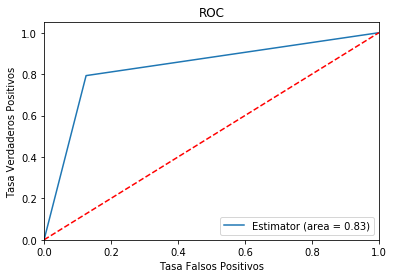

In [80]:
y_pred = clf.predict(X_test)
plotPred(y_test,y_pred)

In [81]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.50%


# Entrenamiento del modelo

In [82]:
from sklearn.model_selection import cross_val_score

clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores 

array([0.82051282, 0.76923077, 0.75324675, 0.83116883, 0.74025974])

**Metrica con roc_auc**

In [83]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict(X_test))
print('FP:',false_positive_rate)
print('TP:', true_positive_rate)
print(auc(false_positive_rate, true_positive_rate)) # (kaggle: FP: 0.23, TP: 0.89)  
print(roc_auc_score(y_test, clf.predict(X_test))) # 0.827 (0.83 kaggle)

FP: [0.         0.12550607 1.        ]
TP: [0.         0.79285714 1.        ]
0.8336755349913244
0.8336755349913244


In [84]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) # kaggle: 0,879

0.9131868131868133

In [85]:
clf.score(X_test, y_test) #0,825 kaggle

0.8449612403100775

**Idem con Gradient Boosting**

In [86]:

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.23, subsample=0.4)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict(X_test))
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, clf.predict(X_test))) # 0,74 (0.53 sin undersampling, 0.78 con undersampling)
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])) # 0,83 (0.88 sin undersampling, 0.87 con undersampling)
print(clf.score(X_test, y_test)) #0,76 (0.947 sin undersampling, 0.80 con undersampling

0.8147484094852516
0.8147484094852516
0.9146327356853673
0.834625322997416


In [87]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict(X_test))
print('FP:',false_positive_rate)
print('TP:', true_positive_rate)
print(auc(false_positive_rate, true_positive_rate)) # (kaggle: FP: 0.23, TP: 0.89)  
print(roc_auc_score(y_test, clf.predict(X_test))) # 0.827 (0.83 kaggle)

FP: [0.         0.11336032 1.        ]
TP: [0.         0.74285714 1.        ]
0.8147484094852516
0.8147484094852516


---
# Modelo con datos finales

In [1]:
import pandas as pd
import numpy as np
from juanFunciones import *
from carlos_utils import *
import matplotlib
%matplotlib inline

In [2]:
types = {
 "event" : "category", 
 "person" : "category", 
 "url" : "category", 
 "sku" : "category", 
 "model" : "category", 
 "condition" : "category", 
 "storage" : "category", 
 "color" : "category", 
 "staticpage" : "category", 
 "campaign_source" : "category", 
 "search_engine" : "category", 
 "channel" : "category", 
 "new_vs_returning" : "category", 
 "city" : "category", 
 "region" : "category", 
 "country" : "category", 
 "device_type" : "category", 
 "screen_resolution" : "category", 
 "operating_system_version" : "category", 
 "browser_version" : "category",
    "os" : "category",
    "model_brand": "category",
    "label":"category"
}

### convertir test

In [3]:
testidx = pd.read_csv("all/trocafone_kaggle_test.csv", dtype={"person":"category"}).set_index("person")

In [4]:
alldf = pd.read_csv("all/events_up_to_01062018.csv", parse_dates=["timestamp"], dtype=types)

/home/juan/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
import juanFunciones

In [6]:
alldf1 = juanFunciones.generateSessions(alldf, "30 min")

alldf = alldf.join(alldf1)

/home/juan/facu/orgadatos/orga2018/TP2/juanFunciones.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nextEvents.loc[nextEvents.index[-1]+1] = ev


Time Difference 30 min


In [7]:
labels = pd.read_csv("all/labels_training_set.csv")

labels = labels.set_index("person").sort_index()

In [8]:
alldf = alldf.join(labels, on="person")

In [9]:
alldf.person = alldf.person.astype("category")

In [10]:
%%time
xall = generateFeatures(alldf, na=True, oneHot=True, encoded=True, label=labels)

eventos para conversion
lagged mes
lagged semana
eventos para visited site
lagged mes
lagged semana
eventos para checkout
lagged mes
lagged semana
eventsPerSession
total seconds
Value counts Events
generating new vs returning


/home/juan/miniconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


One hot columns
model
condition
storage
color
condition
storage
color
model_brand
model_brand
channel
new_vs_returning
region
country
device_type
screen_resolution
operating_system_version
browser_version
CPU times: user 26.5 s, sys: 2.32 s, total: 28.9 s
Wall time: 28.8 s


In [11]:
xall.head()

(ad campaign hit, max)  (ad campaign hit, min)  \
person                                                     
0008ed71                     0.0                     0.0   
00091926                     2.0                     0.0   
00091a7a                     1.0                     1.0   
000ba417                     1.0                     0.0   
000c79fe                     1.0                     1.0   

          (ad campaign hit, mean)  (ad campaign hit, sum)  (checkout, max)  \
person                                                                       
0008ed71                 0.000000                     0.0              1.0   
00091926                 0.441176                    15.0              1.0   
00091a7a                 1.000000                     1.0              0.0   
000ba417                 0.200000                     1.0              2.0   
000c79fe                 1.000000                     1.0              1.0   

          (checkout, min)  (checkout, mean)  (checkout, sum)  \
person                                                         
0008ed71              1.0          1.000000              3.0   
00091926              0.0          0.058824              2.0   
00091a7a              0.0          0.000000              0.0   
000ba417              0.0          1.200000              6.0   
000c79fe              1.0          1.000000              1.0   

          (conversion, max)  (conversion, min)  \
person                                           
0008ed71                0.0                0.0   
00091926                0.0                0.0   
00091a7a                0.0                0.0   
000ba417                1.0                0.0   
000c79fe                0.0                0.0   

                        ...                 max_conversion_model_brand  \
person                  ...                                              
0008ed71                ...                                   0.045418   
00091926                ...                                   0.045418   
00091a7a                ...                                   0.045418   
000ba417                ...                                   0.067568   
000c79fe                ...                                   0.045418   

          max_searched products_model_brand  max_visited_site_channel  \
person                                                                  
0008ed71                           0.042758                  0.068493   
00091926                           0.042758                  0.065789   
00091a7a                           0.042758                  0.042267   
000ba417                           0.042758                  0.065789   
000c79fe                           0.059445                  0.042267   

          max_visited_site_new_vs_returning  max_visited_site_region  \
person                                                                 
0008ed71                           0.034231                 0.048550   
00091926                           0.070889                 0.065972   
00091a7a                           0.034231                 0.058168   
000ba417                           0.070889                 0.053601   
000c79fe                           0.034231                 0.058168   

          max_visited_site_country  max_visited_site_device_type  \
person                                                             
0008ed71                  0.051715                      0.068227   
00091926                  0.051715                      0.068227   
00091a7a                  0.051715                      0.034791   
000ba417                  0.051715                      0.068227   
000c79fe                  0.051715                      0.034791   

          max_visited_site_screen_resolution  \
person                                         
0008ed71                            0.061135   
00091926                            0.090909   
00091a7a                            0

In [12]:
#xall.to_csv("fullJuan.csv")

SyntaxError: EOL while scanning string literal (<ipython-input-12-a688aefe76a5>, line 1)

In [13]:
labels = pd.read_csv("all/labels_training_set.csv")

ytrain = labels.set_index("person").sort_index()

In [14]:
xtrain = xall.loc[ytrain.index]

In [15]:
xtest =  xall.loc[testidx.index]

In [16]:
xtrain = xtrain.sort_index()
ytrain = ytrain.sort_index()

In [17]:
tomasDf = pd.read_csv("persons.csv")

In [18]:
tomasDf = tomasDf.drop("Unnamed: 0", axis=1).set_index("person")

In [19]:
carlosDf = assoc_rules(alldf)

/home/juan/facu/orgadatos/orga2018/TP2/carlos_utils.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  person_event['cant'] = 1


In [20]:
carlos2Df = modelPopularity(alldf)

calculando clases...
armando df de clases...
calculando sku moda por persona...
armando df sku moda por persona
preparando df final...


In [21]:
carlosDf = carlosDf.set_index("person")

In [23]:
carlos2Df = carlos2Df.set_index("person")

In [24]:
carlosDf = carlosDf.join(carlos2Df)

In [25]:
xtrain = xtrain.join(tomasDf, rsuffix="tomas_").join(carlosDf, rsuffix="carlos_")

In [26]:
xtest = xtest.join(tomasDf, lsuffix="tomas_").join(carlosDf, lsuffix="carlos_")

# Train gradient with subsampling

In [27]:
X1 = xtrain

In [28]:
y1 = ytrain

## Eval model

In [45]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, NearestCentroid
def subsample2(X,labels,cut=3):
    persY = labels[labels.label == 1].index
    persN = labels[labels.label == 0].index
    dfFeatN = X.loc[persN]
    clf = NearestNeighbors()
    print("fitting neighbors")
    clf.fit(dfFeatN)
    print("generating graph")
    gr = clf.kneighbors_graph()
    gra = gr.toarray()
    print("adding")
    s = pd.DataFrame(gra).sum()
    sp = s[s < cut]
    pNo = dfFeatN.iloc[sp.index].index
    pNo.values
    finalIdx = np.concatenate((pNo.values,persY.values))
    dfFeatTrans = X.loc[finalIdx]
    labelsTrans = labels.loc[finalIdx]
    return dfFeatTrans, labelsTrans


In [29]:
X2, y2 = subsample2(X1, y1, 10)

fitting neighbors
generating graph
adding


In [30]:
X2 = X2.fillna(0)

In [31]:
X2.shape

(19000, 197)

In [32]:
y2.label.ravel()

array([0, 0, 0, ..., 1, 1, 1])

In [33]:
from imblearn.over_sampling import SMOTE

In [123]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X3, y3 = smote_enn.fit_resample(X2, y2.label.ravel())

In [41]:
X, y = generateSubsample(X2, y2, size=1400)

In [42]:
sm = SMOTE()
X3, Y3 = sm.fit_resample(X, y)

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
#X = X2
#y = Y2

In [174]:
X3.shape

(7962, 195)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss = StandardScaler().fit(X3)

In [49]:
XT = ss.transform(X3)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XT, Y3, test_size=0.15, shuffle=True)

### **Random Forests**

In [52]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [53]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=40, min_samples_split=4, random_state= 0)
clf.fit(X_train, y_train)

CPU times: user 2.01 s, sys: 3.8 ms, total: 2.02 s
Wall time: 2.02 s


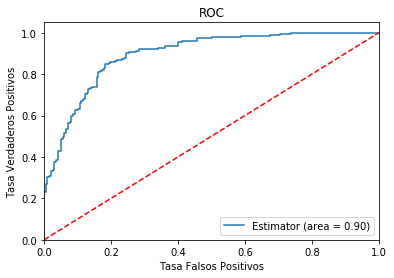

In [54]:
y_pred = clf.predict_proba(X_test)[:, 1]
plotPred(y_test,y_pred)

In [57]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

**Metrica con roc_auc**

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict(X_test))
print('FP:',false_positive_rate)
print('TP:', true_positive_rate)
print(auc(false_positive_rate, true_positive_rate)) # (kaggle: FP: 0.23, TP: 0.89)  
print(roc_auc_score(y_test, clf.predict(X_test))) # 0.827 (0.83 kaggle)

# Entrenamiento del modelo

In [62]:
from xgboost import XGBClassifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
# prepare configuration for cross validation test harness
seed = 7

models = []
clf1 = XGBClassifier(max_depth=30,n_estimators=220, subsample=1, learning_rate=0.16, colsample_bylevel=0.7, colsample_bytree=0.8)
clf2 = RandomForestClassifier(n_estimators=700, criterion="gini", max_depth=20, min_samples_split=4)
clf3 = DecisionTreeClassifier()

models.append(('XGB', clf1))
models.append(('RND', clf2))
models.append(('DT', clf3))

# evaluate each model in turn

XGB: 0.906828 (0.007645)
RND: 0.893011 (0.002979)
DT: 0.751311 (0.008565)


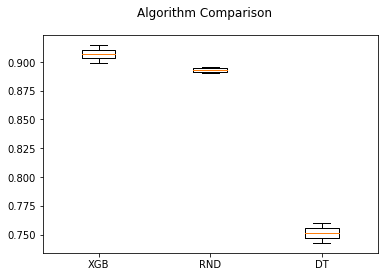

In [67]:
cvForModels(models, XT,Y3, 2)

In [68]:
from sklearn.model_selection import cross_val_score

clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores 

array([0.65882353, 0.77647059, 0.8452381 , 0.79518072, 0.84337349])

**Metrica con roc_auc**

In [137]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict(X_test))
print('FP:',false_positive_rate)
print('TP:', true_positive_rate)
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, clf.predict(X_test)))
print(clf.score(X_test, y_test)) 
print(roc_auc_score(y_test, pd.DataFrame(clf.predict_proba(X_test))[1]))

FP: [0.         0.19796954 1.        ]
TP: [0.         0.87892377 1.        ]
0.8404771118344676
0.8404771118344676
0.8428571428571429
0.9052605221825134


In [234]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) # kaggle: 0,879

0.894819298557949

In [235]:
clf.score(X_test, y_test) #0,825 kaggle

0.8157894736842105

### Voting

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier

In [237]:
from xgboost import XGBClassifier

In [71]:
clf1 = XGBClassifier(max_depth=30,n_estimators=220, subsample=1, learning_rate=0.16, colsample_bylevel=0.7, colsample_bytree=0.8)
clf2 = RandomForestClassifier(n_estimators=700, criterion="gini", max_depth=20, min_samples_split=4)
clf = VotingClassifier(estimators=[('XG', clf1), ('RN', clf2)], voting='soft',  weights=[3,2])

In [135]:
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict(X_test))
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, clf.predict(X_test))) # 0,74 (0.53 sin undersampling, 0.78 con undersampling)
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])) # 0,83 (0.88 sin undersampling, 0.87 con undersampling)
print(clf.score(X_test, y_test)) #0,76 (0.947 sin undersampling, 0.80 con undersampling

0.8404771118344676
0.8404771118344676
0.9052605221825134
0.8428571428571429


In [136]:
plotPred(y_test,clf.predict_proba(X_test)[:, 1])

ValueError: x is neither increasing nor decreasing : [1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1
 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0
 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1
 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 1 1 0 1 0 1 0 1 0 0 0].

**Idem con Gradient Boosting**

In [247]:
from xgboost import XGBClassifier

In [248]:
from sklearn.ensemble import GradientBoostingClassifier
clf = XGBClassifier(n_estimators=500, learning_rate=0.09, subsample=0.8)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test, cv=5)
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict(X_test))
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y_test, clf.predict(X_test))) # 0,74 (0.53 sin undersampling, 0.78 con undersampling)
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])) # 0,83 (0.88 sin undersampling, 0.87 con undersampling)
print(clf.score(X_test, y_test)) #0,76 (0.947 sin undersampling, 0.80 con undersampling

In [132]:
def plotPred(y_test, y_pred):
    import matplotlib.pyplot as plt
    # Evaluamos el modelo
    roc_auc = roc_auc = metrics.auc(y_test, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='Estimator (area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title('ROC')
    plt.xlabel('Tasa Falsos Positivos')
    plt.ylabel('Tasa Verdaderos Positivos')
    plt.savefig('ROC_AUC')
    plt.show()
    # calculate the fpr and tpr for all thresholds of the classification


In [249]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, clf.predict(X_test))
print('FP:',false_positive_rate)
print('TP:', true_positive_rate)
print(auc(false_positive_rate, true_positive_rate)) # (kaggle: FP: 0.23, TP: 0.89)  
print(roc_auc_score(y_test, clf.predict(X_test))) # 0.827 (0.83 kaggle)

FP: [0.         0.16097561 1.        ]
TP: [0.         0.80291971 1.        ]
0.8209720491365498
0.8209720491365498


In [251]:
plotPred(y_test, y_pred[:, 1])

IndexError: too many indices for array

In [387]:
clf1 = XGBClassifier(max_depth=30,n_estimators=300, subsample=0.9, learning_rate=0.05, colsample_bylevel=0.5, colsample_bytree=0.8)
clf2 = RandomForestClassifier(n_estimators=700, criterion="gini", max_depth=20, min_samples_split=4)
clf3 = ExtraTreesClassifier()
clf = VotingClassifier(estimators=[('XG', clf1), ('RN', clf2), ('XT', clf3)], voting='soft',  weights=[4,2,1])


In [143]:
clf = XGBClassifier(max_depth=40,n_estimators=300, subsample=0.9, learning_rate=0.05, colsample_bylevel=0.5, colsample_bytree=0.8)


In [111]:
clf1 = XGBClassifier(max_depth=30,n_estimators=300, subsample=0.9, learning_rate=0.06, colsample_bylevel=0.8, colsample_bytree=0.8)
clf2 = RandomForestClassifier(n_estimators=700, criterion="gini", max_depth=20, min_samples_split=4)
clf = VotingClassifier(estimators=[('XG', clf1), ('RN', clf2)], voting='soft',  weights=[3,2])

In [115]:
sortScores(X,clf.named_estimators_["XG"].feature_importances_).head(10)

0                                          1
195  0.042242                                        sku
181  0.041091                           model_mean_label
50   0.035285                         (total_time, mean)
157  0.031682                    max_visited_site_region
48   0.029830                          (total_time, max)
169  0.026176                     hours_since_last_event
164  0.024925                            duracion_sesion
160  0.024474         max_visited_site_screen_resolution
161  0.023774  max_visited_site_operating_system_version
49   0.023473                          (total_time, min)

In [88]:
import xgboost

In [99]:
X.columns

Index([ ('ad campaign hit', 'max'),  ('ad campaign hit', 'min'),
       ('ad campaign hit', 'mean'),  ('ad campaign hit', 'sum'),
               ('checkout', 'max'),         ('checkout', 'min'),
              ('checkout', 'mean'),         ('checkout', 'sum'),
             ('conversion', 'max'),       ('conversion', 'min'),
       ...
               'staticpagecarlos_',     'viewed productcarlos_',
            'brand listingcarlos_',    'generic listingcarlos_',
             'visited sitecarlos_',               'leadcarlos_',
                  'ass_rules_lift',      'ass_rules_confidence',
                             'sku',                     'class'],
      dtype='object', length=197)

In [100]:
XCOL = pd.DataFrame(XT, columns=X.columns)

In [105]:
xx = xgboost.XGBClassifier(max_depth=30,n_estimators=220, subsample=1, learning_rate=0.16, colsample_bylevel=0.7, colsample_bytree=0.8).fit(XCOL, Y3)

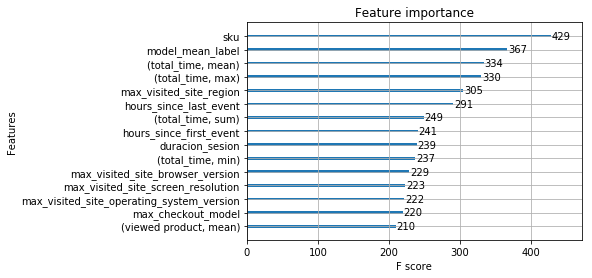

In [106]:
xgboost.plot_importance(xx, max_num_features=15)

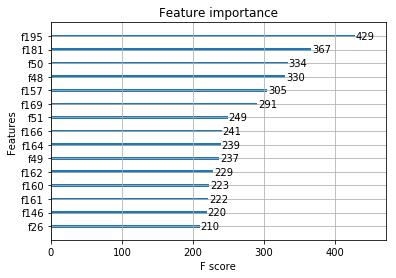

In [91]:
xgboost.plot_importance(clf.named_estimators_["XG"], max_num_features=15)

In [113]:
clf.fit(XT,Y3)

VotingClassifier(estimators=[('XG', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.8, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', r...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[3, 2])

In [116]:
XtT = ss.transform(xtest)

/home/juan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [117]:
xtest.shape

(19415, 197)

In [118]:
y_pred_prob = clf.predict_proba(XtT)

In [119]:
y_pred_prob

array([[0.99026326, 0.00973675],
       [0.77627506, 0.22372495],
       [0.94768701, 0.05231301],
       ...,
       [0.86786428, 0.13213573],
       [0.72553147, 0.27446853],
       [0.7403825 , 0.25961748]])

In [120]:
# Version para el predict_proba
predictionsDf = pd.DataFrame(y_pred_prob)
predictionsDf = predictionsDf[1]
predictionsDf = pd.DataFrame(predictionsDf)
predictionsDf.columns = ['label']
predictionsDf.head(3)

label
0  0.009737
1  0.223725
2  0.052313

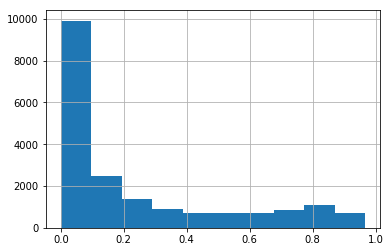

In [121]:
(predictionsDf['label']).hist()

In [122]:
xtestInd = xtest.index

In [123]:
per = pd.DataFrame(xtestInd).join(predictionsDf).set_index("person")

In [124]:
per.to_csv('submit.csv')

In [402]:
#pd.DataFrame(X.index).to_csv("IndexTrain", index=False)

---
---

### Tests with xgboost

In [329]:
X, y = generateSubsample(X1, y1, size=1100)

In [151]:
X, y = subsample2(xtrain, ytrain, 2)

fitting neighbors
generating graph
adding


In [ ]:
clf1 = XGBClassifier(max_depth=30,n_estimators=500, subsample=1, learning_rate=0.16, colsample_bylevel=0.7, colsample_bytree=0.8)
clf2 = RandomForestClassifier(n_estimators=700, criterion="gini", max_depth=20, min_samples_split=4)
clf3 = ExtraTreesClassifier()

In [108]:
# XGBoost on Otto dataset, tune subsample
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

/home/juan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


In [125]:
model = XGBClassifier(max_depth=30,n_estimators=220, subsample=0.9, learning_rate=0.05, colsample_bylevel=0.8, colsample_bytree=0.8)

starting search
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed:   40.6s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   50.4s finished


Best: 0.912939 using {'subsample': 0.8}
0.897340 (0.005816) with: {'subsample': 0.1}
0.902906 (0.009684) with: {'subsample': 0.2}
0.904544 (0.009121) with: {'subsample': 0.3}
0.909106 (0.009196) with: {'subsample': 0.4}
0.911793 (0.007551) with: {'subsample': 0.6}
0.912921 (0.004938) with: {'subsample': 0.7}
0.912939 (0.007342) with: {'subsample': 0.8}
0.912865 (0.007042) with: {'subsample': 0.9}
0.911344 (0.005957) with: {'subsample': 1.0}


Text(0, 0.5, 'ROC_AUC')

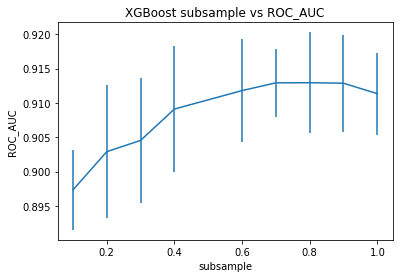

In [131]:
subsample = [0.1, 0.2, 0.3, 0.4, 0.6,0.7,0.8,0.9 ,1.0] # best = 1
learning_rate = [0.01,0.03,0.05, 0.08,0.09, 0.1] # best = 0.03
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0] # best = 0.4
colsample_bylevel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0] # best = 0.5
n_estimators = [10,50,100,150,220,250,300] # best 220
max_depth = [1,3,5,10,15,20,30,40,80,100,140] # best 10
param_grid = dict(subsample=subsample)
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=3)
print("starting search")
grid_result = grid_search.fit(XT, Y3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(subsample, means, yerr=stds)
pyplot.title("XGBoost subsample vs ROC_AUC")
pyplot.xlabel('subsample')
pyplot.ylabel('ROC_AUC')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [164]:
import xgboost as xgb

In [385]:
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)

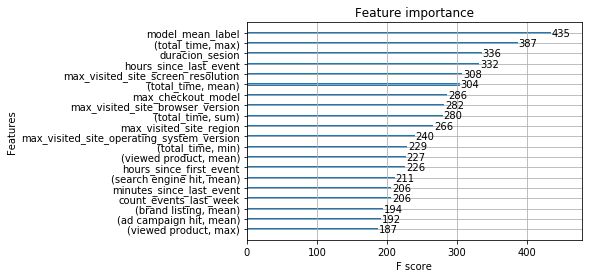

In [386]:
xgb.plot_importance(model, max_num_features=20)

### Parameter search with RFC

In [182]:
# XGBoost on Otto dataset, tune subsample
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

/home/juan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


In [199]:
model = RandomForestClassifier(n_estimators=700, criterion="gini", max_depth=15, min_samples_split=4)

starting search
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed:    1.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.3s finished
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best: 0.762392 using {'min_impurity_decrease': 0.1}
0.762392 (0.013647) with: {'min_impurity_decrease': 0.1}
0.500000 (0.000000) with: {'min_impurity_decrease': 0.2}
0.500000 (0.000000) with: {'min_impurity_decrease': 0.3}
0.500000 (0.000000) with: {'min_impurity_decrease': 0.4}
0.500000 (0.000000) with: {'min_impurity_decrease': 0.5}
0.500000 (0.000000) with: {'min_impurity_decrease': 0.6}
0.500000 (0.000000) with: {'min_impurity_decrease': 0.7}
0.500000 (0.000000) with: {'min_impurity_decrease': 0.8}
0.500000 (0.000000) with: {'min_impurity_decrease': 1.0}


Text(0, 0.5, 'Log Loss')

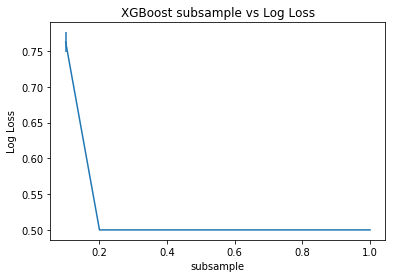

In [198]:
learning_rate = [0.1,0.11,0.13, 0.15,0.16, 0.18, 0.21] # best = 0.16
learning_rate = [0.1,0.11,0.13, 0.15,0.16, 0.18, 0.21] # best = 0.16
class_weight = ["balanced", "balanced_subsample", None] # best = None
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0] # best = 0.8
colsample_bylevel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0] # best = 0.6
n_estimators = [300,400,500,700,1000] # best 700
max_depth = [1,3,5,10,15,20,30,40,80,100,140] # best 15
min_samples_split = [2,3,4,5,6,7,8]
min_impurity_decrease = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
oob_score = [True, False]
min_weight_fraction_leaf = [0.01, 0.02, 0.04, 0.07] # Best = 0
param_grid = dict(min_impurity_decrease=min_impurity_decrease)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=3)
print("starting search")
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(subsample, means, yerr=stds)
pyplot.title("XGBoost subsample vs Log Loss")
pyplot.xlabel('subsample')
pyplot.ylabel('Log Loss')

In [ ]:
clf2 = RandomForestClassifier(n_estimators=1000, criterion="gini", max_depth=100, min_samples_split=4, random_state= 0)


In [337]:
import xgboost as xgb

In [342]:
model.fit(X,y)

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.8, gamma=0, learning_rate=0.28, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

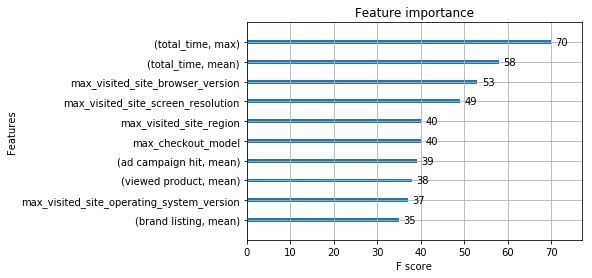

In [346]:
xgb.plot_importance(model,max_num_features=10)


(ad campaign hit, max)  (ad campaign hit, min)  \
person                                                     
003476c0                     4.0                     0.0   
003dd965                     0.0                     0.0   
0042421c                     1.0                     0.0   
006671fd                     0.0                     0.0   
0143d796                     1.0                     1.0   
01ed2afc                     1.0                     1.0   
02875920                     2.0                     0.0   
03754d73                     2.0                     0.0   
03c99f07                     2.0                     1.0   
03db7c49                     0.0                     0.0   
0404e68f                     4.0                     0.0   
041dc456                     1.0                     1.0   
043ec736                     5.0                     0.0   
0457712f                     3.0                     0.0   
04bbc907                     3.0                     0.0   
04d2d0ee                     0.0                     0.0   
052078d1                     1.0                     0.0   
05596145                     2.0                     0.0   
05b22e4c                     5.0                     0.0   
05d9ceb0                     8.0                     0.0   
0601784e                    11.0                     0.0   
06aeda65                     0.0                     0.0   
06eeb3e7                     1.0                     0.0   
071dabb9                     1.0                     1.0   
071e79e1                     1.0                     0.0   
073e697a                    10.0                     0.0   
07aabe67                     2.0                     0.0   
07cdc12c                     1.0                     0.0   
0812bda0                     4.0                     0.0   
08176776                     3.0                     0.0   
...                          ...                     ...   
f4442a09                     1.0                     1.0   
755dc00e                     2.0                     2.0   
ed8abe28                     5.0                     5.0   
7ae3ad82                     0.0                     0.0   
c5f1bc3d                     1.0                     1.0   
b620df7d                     3.0                     0.0   
927c18ba                     3.0                     3.0   
83c81e8c                     4.0                     0.0   
51ac5a4e                     2.0                     2.0   
77a86756                     2.0                     2.0   
1e83d76c                     0.0                     0.0   
30354904                     3.0                     0.0   
a4a373a4                     1.0                     1.0   
9c02c892                     4.0                     0.0   
2a9e0fb0                     7.0                     0.0   
3c45a766                    19.0                     2.0   
647dd511                     2.0                     1.0   
55891a41                     3.0                     0.0   
55891a41                     3.0                     0.0   
b8755a75                     0.0                     0.0   
4ab57b8a                     7.0                     1.0   
93b01c22                     4.0                     0.0   
9046a78e                     0.0                     0.0   
74478783                     1.0                     0.0   
ecd5d90b                     1.0                     1.0   
060f1915                     1.0                     1.0   
f5256da2                     0.0                     0.0   
eb5675f1                     1.0                     1.0   
912d958d                     4.0                     0.0   
6294a38a                     5.0                     5.0   

          (ad campaign hit, mean)  (ad campaign hit, sum)  (checkout, max)  \
person                                                                       
003476c0                 1.500000                     6.0              0.

In [307]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(dfFeat, labels.label)

# eval Gradient Boosting

In [18]:
X1, y1 = subsample2(dfFeat.fillna(0), labels, 10)

fitting neighbors
generating graph
adding


In [411]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(sampling_strategy=0.4)
X_resampled, y_resampled = smote_enn.fit_resample(X1,y1)

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [412]:
X_resampled.shape

(21727, 692)

In [413]:
dfr = pd.DataFrame(X_resampled)

In [414]:
dfr["label"] = y_resampled

In [415]:
dfr.label.value_counts()

0    10864
1    10863
Name: label, dtype: int64

In [313]:
clf = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, subsample=0.4)

In [314]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_resampled, y = y_resampled, cv = 5, scoring="roc_auc")
accuracies.mean()

KeyboardInterrupt: 

In [116]:
X1 = dfFeatTrans
y1 = labelsTrans

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [119]:
clf.fit(X_train, y_train)

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.4)

In [120]:
y_pred = clf.predict(X_test)

In [121]:
from sklearn.metrics import roc_auc_score

In [122]:
roc_auc_score(y_test, y_pred)

0.9934640522875817

# Model Train

In [141]:
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier

"""
    Logistic Regression
    Linear Discriminant Analysis
    K-Nearest Neighbors
    Classification and Regression Trees
    Naive Bayes
    Support Vector Machines
"""

In [159]:
X = dfFeat.sort_index()

In [160]:
Y = labels.label.ravel()

## Evaluate k best

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

def sortScores(X,scoring):
    scores =[]
    for i,score in enumerate(scoring):
        scores.append([score, X.columns[i]])

    return pd.DataFrame(scores).sort_values(by=0, ascending=False)

In [163]:
clf = GradientBoostingClassifier().fit(X, Y)

In [164]:
sortScores(X, clf.feature_importances_).head(10)

0                            1
42   0.024278                 (lead, mean)
145  0.022966    conversion_Dia_del_año_54
187  0.022138    conversion_Dia_del_año_97
26   0.020822       (viewed product, mean)
49   0.020494            (total_time, min)
31   0.020421         (brand listing, sum)
152  0.020226    conversion_Dia_del_año_62
604  0.016479      checkout_Dia_del_año_91
359  0.016265  visited site_Dia_del_año_57
662  0.016099     checkout_Dia_del_año_149

Como se puede ver, da muy poca importancia a las columnas, sin embargo al hacer un subsample crece mucho

In [165]:
X1, Y1 = generateSubsample(X,labels, size=3000)

In [166]:
clf = GradientBoostingClassifier().fit(X1, Y1)

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
sortScores(X1, clf.feature_importances_).head(20)

0                             1
672  0.118170         checkout_from_week_20
30   0.029220         (brand listing, mean)
50   0.024556            (total_time, mean)
48   0.024166             (total_time, max)
26   0.022489        (viewed product, mean)
511  0.021560      checkout_Dia_de_semana_3
241  0.018368    conversion_Dia_del_año_151
51   0.016356             (total_time, sum)
333  0.015516   visited site_Dia_del_año_31
34   0.015177       (generic listing, mean)
673  0.014255         checkout_from_week_19
453  0.013852  visited site_Dia_del_año_151
49   0.013394             (total_time, min)
236  0.013017    conversion_Dia_del_año_146
24   0.012627         (viewed product, max)
677  0.011712         checkout_from_week_15
6    0.011322              (checkout, mean)
293  0.010966            visited site_Mes_3
495  0.010824            checkout_Semana_15
276  0.010682         visited site_Semana_8

In [35]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [39]:
clf = GradientBoostingClassifier()

In [40]:
clf.fit(X1, y1)

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [42]:
sortScores(X1,clf.feature_importances_).head(20)

0                             1
48   0.344099             (total_time, max)
460  0.258174     visited site_from_week_21
293  0.075608            visited site_Mes_3
26   0.068115        (viewed product, mean)
290  0.035370        visited site_Semana_22
14   0.033191     (search engine hit, mean)
50   0.031987            (total_time, mean)
25   0.018470         (viewed product, min)
287  0.017481        visited site_Semana_19
51   0.013827             (total_time, sum)
459  0.011227     visited site_from_week_22
27   0.006041         (viewed product, sum)
675  0.006021         checkout_from_week_17
283  0.005616        visited site_Semana_15
681  0.005344         checkout_from_week_11
95   0.005314    conversion_Dia_de_semana_3
22   0.005066            (staticpage, mean)
61   0.004905                viewed product
428  0.003905  visited site_Dia_del_año_126
24   0.003482         (viewed product, max)

In [43]:
y_pred = clf

(ad campaign hit, max)  (ad campaign hit, min)  \
person                                                     
001b0bf9                     0.0                     0.0   
000c79fe                     1.0                     1.0   
001802e4                     5.0                     5.0   
001dfc31                     2.0                     0.0   
0019e639                     4.0                     0.0   
001e9aea                     4.0                     1.0   
001dfc31                     2.0                     0.0   
001ca5ee                     2.0                     0.0   
0019e639                     4.0                     0.0   
001b0bf9                     0.0                     0.0   
001b0bf9                     0.0                     0.0   
001dfc31                     2.0                     0.0   
001b0bf9                     0.0                     0.0   
001ca5ee                     2.0                     0.0   
001e9aea                     4.0                     1.0   
001ca5ee                     2.0                     0.0   
0019e639                     4.0                     0.0   
001dfc31                     2.0                     0.0   
001dfc31                     2.0                     0.0   
001dfc31                     2.0                     0.0   
001e9aea                     4.0                     1.0   
001e9aea                     4.0                     1.0   
001b0bf9                     0.0                     0.0   
001e9aea                     4.0                     1.0   
001ca5ee                     2.0                     0.0   
001802e4                     5.0                     5.0   
001b0bf9                     0.0                     0.0   
0008ed71                     0.0                     0.0   
000c79fe                     1.0                     1.0   
001dfc31                     2.0                     0.0   
...                          ...                     ...   
f6fb48d8                     3.0                     0.0   
f78cef71                     1.0                     1.0   
f7e24b08                     1.0                     0.0   
f7eac665                     3.0                     1.0   
f7fdbbf4                    16.0                     0.0   
f853109d                     1.0                     0.0   
f937cc56                     0.0                     0.0   
fa6682fd                     1.0                     0.0   
fa7627cb                     4.0                     0.0   
fab234eb                    12.0                     1.0   
fb00f295                     2.0                     0.0   
fb589f12                     1.0                     0.0   
fb6346bc                     1.0                     0.0   
fb64ce0c                     1.0                     0.0   
fb9c9930                     5.0                     1.0   
fc0ed41a                     0.0                     0.0   
fc163c0f                     3.0                     0.0   
fc278339                     2.0                     0.0   
fc5662b5                    11.0                     0.0   
fcdb0b35                     4.0                     1.0   
fce63e6f                     1.0                     1.0   
fced488f                     0.0                     0.0   
fd0721f7                     2.0                     0.0   
fdea1161                     1.0                     0.0   
fe02986e                     4.0                     0.0   
fe7bca52                     0.0                     0.0   
fe93350e                     0.0                     0.0   
fefb2f33                     0.0                     0.0   
ff05db81                     1.0                     1.0   
ff884f1a                     1.0                     0.0   

          (ad campaign hit, mean)  (ad campaign hit, sum)  (checkout, max)  \
person                                                                       
001b0bf9                 0.000000                     0.0              2.

## evaluate models

In [65]:
from sklearn.metrics import roc_auc_score

In [64]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [59]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import model_selection
def cvForModels(models, X, Y, cvsplits=5):
    results = []
    names = []
    scoring = 'roc_auc'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=cvsplits, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [406]:
# prepare configuration for cross validation test harness
seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR: 0.999850 (0.000150)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.999972 (0.000028)
KNN: 1.000000 (0.000000)
CART: 0.999402 (0.000137)
NB: 0.998669 (0.000232)


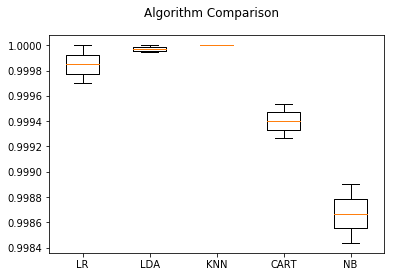

In [407]:
cvForModels(models, X_resampled,y_resampled, 2)

In [167]:
from sklearn.ensemble import BaggingClassifier, 

ImportError: cannot import name 'DecisionTreeClassifier'

In [166]:
models = []
models.append(('EXTRA', ExtraTreesClassifier()))
models.append(('GRAD', GradientBoostingClassifier()))
models.append(('BAG', BaggingClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

ImportError: cannot import name 'DecisionTreeClassifier'

In [ ]:
cvForModels(models, X1, y1, 2)

In [179]:

models = []
models.append(('LR', LogisticRegression(solver="lbfgs",class_weight="balanced", )))
models.append(('RAND1', RandomForestClassifier(class_weight="balanced_subsample")))
models.append(('EXTRA1', ExtraTreeClassifier(class_weight="balanced")))
models.append(('RAND2', RandomForestClassifier(class_weight="balanced")))
models.append(('BAG', BaggingClassifier()))


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR: 0.704289 (0.004743)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


RAND1: 0.837809 (0.007372)
EXTRA1: 0.667671 (0.011738)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A c

RAND2: 0.832435 (0.002858)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BAG: 0.831262 (0.023400)


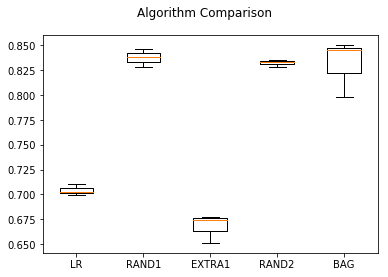

In [180]:
cvForModels(models,X1, Y1, 3)

In [155]:
from sklearn.ensemble import ExtraTreesClassifier

In [159]:
models = []
models.append(('EXTRA1', ExtraTreesClassifier(class_weight="balanced")))
models.append(('GRAD',GradientBoostingClassifier(subsample=0.5)))
models.append(('GRAD2',RandomForestClassifier()))
models.append(('XDG',XGBClassifier()))

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

EXTRA1: 0.911228 (0.003356)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GRAD: 0.899315 (0.008354)
GRAD2: 0.903852 (0.006821)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

XDG: 0.902677 (0.010344)


NameError: name 'ax' is not defined

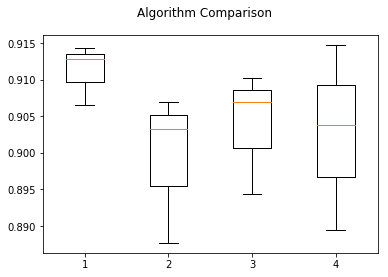

In [160]:
cvForModels(models,X, y,3)

# Generate Subsample

In [19]:
X1, y1 = generateSubsample(dfFeat, labels, size=2500)

In [20]:
X1 = X1.fillna(0)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1.label, test_size=0.2)

## XGBoost

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, subsample=0.1)

In [60]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
roc_auc_score(y_test,y_pred)

0.7449209443361491

In [62]:
from sklearn.model_selection import cross_val_score
clf = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, subsample=0.5)
accuracies = cross_val_score(estimator = clf, X = X1, y = y1, cv = 3, scoring="roc_auc")
accuracies.mean()

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

0.8640861100166976

/home/juan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


starting search
Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] subsample=0.1 ...................................................
[CV] subsample=0.1 ...................................................
[CV] subsample=0.1 ...................................................
[CV] subsample=0.2 ...................................................
[CV] subsample=0.2 ...................................................
[CV] subsample=0.2 ...................................................
[CV] subsample=0.3 ...................................................
[CV] subsample=0.3 ...................................................
[CV] ......... subsample=0.1, score=0.49633774008853326, total=  31.9s
[CV] .......... subsample=0.1, score=0.4940121876267471, total=  31.7s
[CV] subsample=0.3 ...................................................
[CV] subsample=0.4 ...................................................
[CV] .......... subsample=0.1, score=0.4830444585570041, total=  32.6s
[

[Parallel(n_jobs=-1)]: Done  10 out of  18 | elapsed:  2.0min remaining:  1.6min


[CV] ......... subsample=1.0, score=0.49863542374273107, total= 1.2min
[CV] .......... subsample=0.4, score=0.5085112214819785, total= 1.4min
[CV] .......... subsample=0.7, score=0.4984970750193464, total= 1.3min
[CV] ......... subsample=0.7, score=0.48578815227317407, total= 1.3min
[CV] ......... subsample=0.7, score=0.48641824234726483, total= 1.2min
[CV] .......... subsample=1.0, score=0.4922912887581709, total=  17.0s
[CV] ........... subsample=1.0, score=0.486193573060455, total=  25.3s


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.4min finished


Best: 0.497721 using {'subsample': 0.4}
0.491132 (0.005796) with: {'subsample': 0.1}
0.487448 (0.004338) with: {'subsample': 0.2}
0.481914 (0.005500) with: {'subsample': 0.3}
0.497721 (0.013562) with: {'subsample': 0.4}
0.490235 (0.005848) with: {'subsample': 0.7}
0.492374 (0.005080) with: {'subsample': 1.0}


Text(0, 0.5, 'Log Loss')

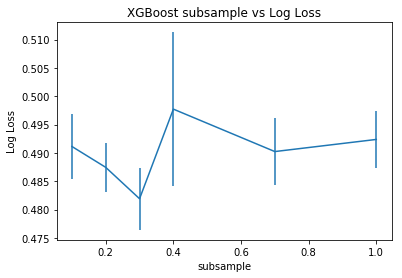

In [257]:
# XGBoost on Otto dataset, tune subsample
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
model = XGBClassifier()
subsample = [0.1, 0.2, 0.3, 0.4, 0.7, 1.0]
param_grid = dict(subsample=subsample)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=3)
print("starting search")
grid_result = grid_search.fit(dfFeat, labels.label)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(subsample, means, yerr=stds)
pyplot.title("XGBoost subsample vs Log Loss")
pyplot.xlabel('subsample')
pyplot.ylabel('Log Loss')

array([0.86600279, 0.86596058, 0.84900105, 0.84776386, 0.84844275,
       0.85988138])

In [196]:
sortScores(X_train,clf.feature_importances_).head(20)


0                             1
50   0.058728            (total_time, mean)
672  0.050571         checkout_from_week_20
51   0.029364             (total_time, sum)
48   0.029364             (total_time, max)
27   0.027732         (viewed product, sum)
30   0.027732         (brand listing, mean)
290  0.026101        visited site_Semana_22
2    0.026101       (ad campaign hit, mean)
24   0.024470         (viewed product, max)
26   0.021207        (viewed product, mean)
10   0.019576            (conversion, mean)
236  0.017945    conversion_Dia_del_año_146
22   0.017945            (staticpage, mean)
293  0.017945            visited site_Mes_3
14   0.017945     (search engine hit, mean)
31   0.016313          (brand listing, sum)
677  0.016313         checkout_from_week_15
38   0.016313          (visited site, mean)
453  0.014682  visited site_Dia_del_año_151
35   0.014682        (generic listing, sum)

# Voting

In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier

In [198]:
clf1 = LogisticRegressionCV(scoring="roc_auc",cv=3, max_iter=150)
clf2 = GradientBoostingClassifier(learning_rate=0.05 , max_features=30)
clf3 = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05)
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)], voting='hard',  weights=[1,3,3])

eclf1.fit(X_train, y_train)

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=150,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring='roc_auc', solver='lbfgs', tol=0.0001,
     ...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))],
         flatten_transform=None, n_jobs=1, voting='hard',
         weights=[1, 3, 3])

In [199]:
y_pred = eclf1.predict(X_test)

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


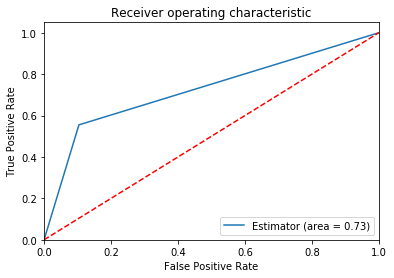

Accuracy: 81.03%


In [200]:
from sklearn import metrics
import matplotlib.pyplot as plt
# Evaluamos el modelo
est_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Estimator (area = %0.2f)' % est_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [68]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('EXTRA', ExtraTreeClassifier()))
models.append(('GRAD', GradientBoostingClassifier()))
models.append(('BAG', BaggingClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('ADA', AdaBoostClassifier()))
models.append(('RND', RandomForestClassifier()))
models.append(('XDG',xgb.XGBClassifier(n_estimators=200)))
#models.append(('ISO', IsolationForest()))
#models.append(('VOT', eclf1))

In [69]:
cvForModels(models, X_train, y_train, 3)

NameError: name 'cvForModels' is not defined

In [ ]:
X_train.head()

In [491]:
mod = model.fit(X_train, y_train)

sortScores(X_train,mod.coef_[0])

/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:752: DataConv

LOG: 0.702960 (0.017420)


/home/juan/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


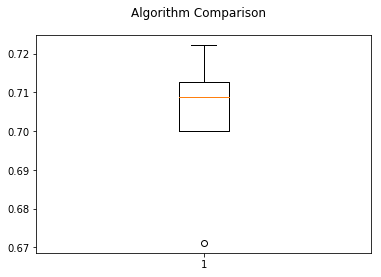

In [477]:
model = LogisticRegression(C=0.8)
kfold = model_selection.KFold(n_splits=5, shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
msg = "%s: %f (%f)" % ("LOG", cv_results.mean(), cv_results.std())
print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_results)
plt.show()

### **Gradient Boosting**

In [282]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [283]:
from sklearn.ensemble import GradientBoostingClassifier

In [291]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.23, subsample=0.4)
clf.fit(X_train.drop("(checkout, mean)"), y_train)
y_pred = clf.predict(X_test)


%time
import matplotlib.pyplot as plt
# Evaluamos el modelo
est_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Estimator (area = %0.2f)' % est_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

KeyError: "['(checkout, mean)'] not found in axis"

In [288]:
sortScores(X,clf.feature_importances_).head(20)


0                          1
6    0.441132           (checkout, mean)
51   0.061203          (total_time, sum)
10   0.046525         (conversion, mean)
48   0.033379          (total_time, max)
5    0.031828            (checkout, min)
93   0.029611            Dia_de_semana_3
19   0.025602   (searched products, sum)
38   0.021611       (visited site, mean)
247  0.021473   conversions_from_week_20
30   0.020824      (brand listing, mean)
2    0.020393    (ad campaign hit, mean)
18   0.018711  (searched products, mean)
264  0.016700    conversions_from_week_3
14   0.015951  (search engine hit, mean)
26   0.015049     (viewed product, mean)
28   0.014976       (brand listing, max)
17   0.014482   (searched products, min)
27   0.013172      (viewed product, sum)
91   0.011962            Dia_de_semana_1
56   0.011200            generic listing

In [302]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, criterion="gini", max_depth=100, random_state= 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/juan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 3.83 s, sys: 3.87 ms, total: 3.83 s
Wall time: 3.83 s


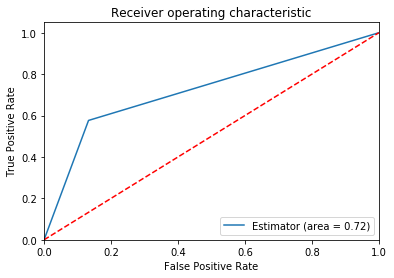

Accuracy: 76.84%
CPU times: user 260 ms, sys: 0 ns, total: 260 ms
Wall time: 258 ms


In [303]:
%%time
import matplotlib.pyplot as plt
# Evaluamos el modelo
est_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Estimator (area = %0.2f)' % est_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [304]:
%%time
from sklearn.ensemble import RandomForestClassifier
clf = ExtraTreeClassifier(max_features=20, class_weight={1:1, 0:0.2})
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

CPU times: user 11.9 ms, sys: 76 µs, total: 12 ms
Wall time: 10.6 ms


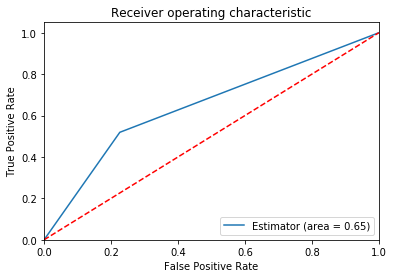

Accuracy: 68.72%
CPU times: user 176 ms, sys: 7.93 ms, total: 184 ms
Wall time: 183 ms


In [305]:
%%time
import matplotlib.pyplot as plt
# Evaluamos el modelo
est_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Estimator (area = %0.2f)' % est_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

---
# Generate submit

### convertir test

In [27]:
testidx = pd.read_csv("all/trocafone_kaggle_test.csv", dtype={"person":"category"}).set_index("person")

In [28]:
alldf = pd.read_csv("all/events_up_to_01062018.csv", parse_dates=["timestamp"], dtype=types)

/home/juan/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
alldf1 = generateSessions(alldf, "30 min")

alldf = alldf.join(alldf1)

/home/juan/facu/orgadatos/orga2018/TP2/juanFunciones.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  nextEvents.loc[nextEvents.index[-1]+1] = ev


Time Difference 30 min


In [30]:
%%time
xall = generateFeatures(alldf)

eventos para conversion
Semana
Mes
Dia_del_mes
Dia_del_año
lagged mes
lagged semana
eventos para visited site
Semana
Mes
Dia_del_mes
Dia_del_año
lagged mes
lagged semana
eventos para checkout
Semana
Mes
Dia_del_mes
Dia_del_año
lagged mes
lagged semana
eventsPerSession
total seconds
Value counts Events
generating new vs returning


/home/juan/miniconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


CPU times: user 12.9 s, sys: 657 ms, total: 13.5 s
Wall time: 13.5 s


In [31]:
labels = pd.read_csv("all/labels_training_set.csv")

ytrain = labels.set_index("person").sort_index()

In [32]:
xtrain = xall.loc[ytrain.index]

In [33]:
xtest =  xall.loc[testidx.index]

In [34]:
xtrain = xtrain.sort_index()
ytrain = ytrain.sort_index()

#### subsample

In [ ]:
from imblearn.under_sampling import 

In [386]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(xtrain.fillna(0), ytrain.label)

In [390]:
xtrain.shape

(19414, 700)

In [285]:
X1, y1 = subsample2(xtrain.fillna(0), ytrain, 3)

fitting neighbors
generating graph
adding


In [35]:
X1, y1 = generateSubsample(xtrain.fillna(0), ytrain, 2400)

In [36]:
clf = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, subsample=0.5)

In [287]:
#X1, y1 = generateSubsample(xtrain,ytrain, size=3000)

In [288]:
#X1 = X1.fillna(0)

In [372]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [373]:
from sklearn.ensemble import GradientBoostingClassifier

In [374]:
%%time
clf = clf = RandomForestClassifier()

CPU times: user 36 µs, sys: 1e+03 ns, total: 37 µs
Wall time: 41.5 µs


In [375]:
clf.fit(X_resampled, y_resampled)

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
X1, y1 = generateSubsample(xtrain.fillna(0), ytrain, 2100)

In [84]:
clf = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, subsample=0.5)

In [85]:
clf.fit(X1, y1.label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5)

In [96]:
y_pred = clf.predict(xtrain.fillna(0))

In [94]:
y_predd = pd.DataFrame(y_pred)[1]

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
roc_auc_score(ytrain.label.values, y_pred)

0.49974276680402

In [379]:
y_test = ytrain.label

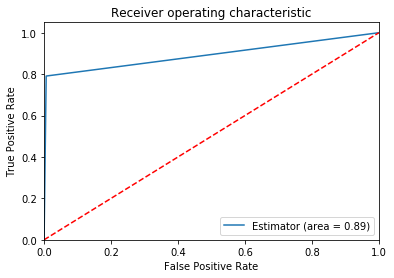

Accuracy: 98.35%
CPU times: user 276 ms, sys: 168 ms, total: 444 ms
Wall time: 168 ms


In [380]:
%%time
import matplotlib.pyplot as plt
from sklearn import metrics
# Evaluamos el modelo
est_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='Estimator (area = %0.2f)' % est_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [283]:
models = []
clas = xgb.XGBClassifier(n_estimators=200, learning_rate=0.15, subsample=0.4)
models.append(('LR', LogisticRegression()))
models.append(('EXTRA', ExtraTreeClassifier()))
models.append(('GRAD', GradientBoostingClassifier()))
models.append(('BAG', BaggingClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RND', RandomForestClassifier()))
models.append(('XDG',clas))
models.append(('ISO', IsolationForest()))
#models.append(('VOT', eclf1))

/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConv

LR: 0.762333 (0.007156)
EXTRA: 0.674135 (0.004554)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GRAD: 0.857562 (0.007160)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BAG: 0.826790 (0.005719)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KNN: 0.607574 (0.017778)
CART: 0.682695 (0.009153)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ADA: 0.833272 (0.006968)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

RND: 0.825532 (0.002632)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

XDG: 0.837730 (0.003595)


/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/juan/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function ch

ISO: 0.388164 (0.026475)


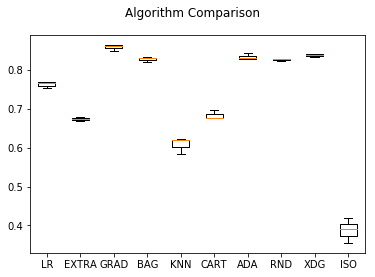

In [284]:
cvForModels(models, X1, y1, 3)

In [35]:
X1, y1 = generateSubsample(xtrain.fillna(0), ytrain, 2400)

In [36]:
clf = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, subsample=0.5)

In [71]:
clf.fit(X1, y1.label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.4)

In [75]:
sortScores(X1, clf.feature_importances_)

0                             1
50   0.041775            (total_time, mean)
48   0.036031             (total_time, max)
680  0.035509         checkout_from_week_20
26   0.034987        (viewed product, mean)
34   0.026110       (generic listing, mean)
49   0.025065             (total_time, min)
30   0.025065         (brand listing, mean)
27   0.024543         (viewed product, sum)
2    0.023499       (ad campaign hit, mean)
14   0.023499     (search engine hit, mean)
6    0.021410              (checkout, mean)
10   0.020888            (conversion, mean)
51   0.020366             (total_time, sum)
3    0.018799        (ad campaign hit, sum)
18   0.018799     (searched products, mean)
28   0.017755          (brand listing, max)
24   0.016710         (viewed product, max)
38   0.016710          (visited site, mean)
31   0.016710          (brand listing, sum)
297  0.014621        visited site_Semana_22
0    0.013055        (ad campaign hit, max)
25   0.011488         (viewed product, min)
15   0.011488      (search engine hit, sum)
467  0.010966     visited site_from_week_21
460  0.009922  visited site_Dia_del_año_151
32   0.009922        (generic listing, max)
16   0.008877      (searched products, max)
35   0.008877        (generic listing, sum)
296  0.008355        visited site_Semana_21
22   0.007833            (staticpage, mean)
..        ...                           ...
271  0.000000        conversion_from_week_5
272  0.000000        conversion_from_week_4
274  0.000000        conversion_from_week_2
276  0.000000         visited site_Semana_1
277  0.000000         visited site_Semana_2
278  0.000000         visited site_Semana_3
279  0.000000         visited site_Semana_4
282  0.000000         visited site_Semana_7
284  0.000000         visited site_Semana_9
310  0.000000    visited site_Dia_del_año_1
311  0.000000    visited site_Dia_del_año_2
266  0.000000       conversion_from_week_10
264  0.000000       conversion_from_week_12
263  0.000000       conversion_from_week_13
246  0.000000    conversion_Dia_del_año_149
239  0.000000    conversion_Dia_del_año_142
240  0.000000    conversion_Dia_del_año_143
241  0.000000    conversion_Dia_del_año_144
242  0.000000    conversion_Dia_del_año_145
243  0.000000    conversion_Dia_del_año_146
244  0.000000    conversion_Dia_del_año_147
247  0.000000    conversion_Dia_del_año_150
261  0.000000       conversion_from_week_15
248  0.000000    conversion_Dia_del_año_151
249  0.000000       conversion_from_month_5
252  0.000000       conversion_from_month_2
254  0.000000       conversion_from_week_22
258  0.000000       conversion_from_week_18
260  0.000000       conversion_from_week_16
699  0.000000          checkout_from_week_1

[700 rows x 2 columns]

In [76]:
predicts = clf.predict(xtest.fillna(0))

In [78]:
xtest["preds"] = predicts

/home/juan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
pred = xtest.preds

pred = pred.reset_index()
pred = pred.rename(columns={"preds":"label"})

In [80]:
pred.to_csv("submit.csv", index=False)

In [81]:
pred.index

RangeIndex(start=0, stop=19415, step=1)

In [82]:
pred.label.value_counts()

0    16030
1     3385
Name: label, dtype: int64